
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 4**

Instructor: Yoonsuck Choe

Nov 4, 2022


---

**Student name: Cheng, Cheng-Yun


---

# Common instructions (Read carefully)

**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```

# Section I: Dimensionality Reduction

**Problem 1 (Written: 10pts):** 

Consider the data sets below: Data set 1 = Spiral data, Data set 2 = Point cloud data, and Data set 3 = simple data. You can plot the data first. 
- Plot the first column in the data against the second column
``` D1[:,0] , D1[:,1] ```
- Make sure you use aspect ratio of 1 when plotting, so that the x- and y-axis have the same scale.
```
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(....)
```
- Use "." for plotting style:  
```plt.plot(...,".") ```

(1) Which of the three data sets D1, D2, and D3 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

(2) Which of the three data sets D1, D2, and D3 would be the least appropriate for  PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

**Hint:** 
- Although the data are not labled into different classes, you may be able to "see" two possible groups of points in each data set. When you use  PCA to project all the data points to the PCA space (using the 1st and 2nd principal component vectors), would you be able to distinguish the two groups, just based on the 1st principal component axis? 
- Also, you can think about the variance in the original data (along the two axes) and the variance in the resulting projection (along the two principal component axes). 



**Answer:**

Fill out the code cell below for the plot, and enter your answer here:

(1) D2 would be the most appropriate for PCA analysis. This is because that the variance along the two principal component axes is larger than the original one. Therefore, it is easy to distinguish two group based on principal component axes.

(2) D1 would be the least appropriate for PCA analysis. This is because that the variance along origin axes and along principal component axes is close. It is still hard to distinguish two group.  


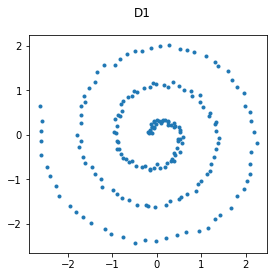

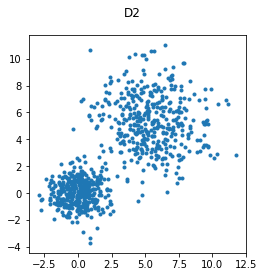

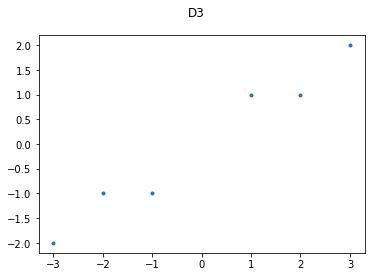

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#--------------------
def spiral_1(t):
#--------------------
  '''
  parametric curve of a spiral : clockwise
  '''
  rand_factor = 1.0

  dat   = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
  noise = np.random.rand(2,len(dat[0,:]))*rand_factor
  return (dat+noise-0.5)/7.5


"""
Data set 1 : D1 = spiral like data

- This is a variation on the parametric plot for a circle [cos(t), sin(t)], with a gradually increasing radius. 
"""

# data set 1 [x, y]

t = np.arange(0, 6*np.pi, 0.1)
D1 =  np.transpose(spiral_1(t))

# Plot it
# -- add your plotting code here

fig=plt.figure()
fig.suptitle('D1')
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D1[:,0], D1[:,1], '.')

"""
Data set 2 : D2 = point cloud data (normal distribution)
"""

x = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))
y = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))

D2 = np.vstack((x,y)).T

# Plot it 
# -- add your plotting code here

fig=plt.figure()
fig.suptitle('D2')
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D2[:,0], D2[:,1], '.')

"""
Data set 3: D3 = simple data
"""

D3 = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# Plot it
# -- add your plotting code here : use aspect ratio 1 (see below)

fig=plt.figure()
fig.suptitle('D3')
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D3[:,0], D3[:,1], '.')

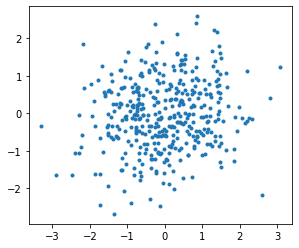

In [3]:
# Example plotting code

# data 
x = np.random.normal(0,1,400)
y = np.random.normal(0,1,400)

# plot
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x,y,'.')  
ax.set_aspect('equal') # set aspect ratio to 1.0

**Problem 2 (Program: 15pt)**

Use scikit learn's PCA package to analyze the data set from problem 1. Use the template below.

```
from sklearn.decomposition import PCA

X = .... # data (you can reuse D1, D2, D3 from above (Problem 1)

# plot X : X[:,0] against X[:,1]

pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)

Z = pca.fit_transform(X)


# plot Z : Z[:,0] against Z[:,1]

```

For each of the three data sets D1, D2, D3: 

(1) [1pt] Plot the original data set (X). Fix aspect ratio to 1. 

(2) [1pt] Plot the projected data set (Z). Fix aspect ratio to 1. 

(3) [2pt] Compare the variance along the first and second principal component vectors (```pca.singular_values_```) for each data set.

- D1: 
- D2:
- D3: 

(4) [6pt] Comment on how these results relate to your answers in Problem 1. 





**Answer:**

Fill out the code in the code cell below, and enter your answer here: 

(1) Just refer to the code below. 

(2) Just refer to the code below.

(3) The variance along the first and second principal component vectors

*   D1: [15.77148867, 14.60832866]
*   D2: [114.4494992, 42.27115042]
*   D3: [6.30061232, 0.54980396]

(4) For D1, the distribution of tha data points in the original space and in the projected space are similar. It does not get much benefit from PCA. On the other hand, for D2, the variance along the first principal component is large, and we can easily distinguish two group based on this component. D3 has less data and its data could be sepereate easily in original space. Alougth its PCA result is good, it is still not necessary.


D1
Singuler values [15.7330755  14.56424131]


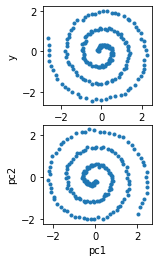

D2
Singuler values [115.91913121  47.69068767]


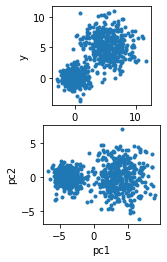

D3
Singuler values [6.30061232 0.54980396]


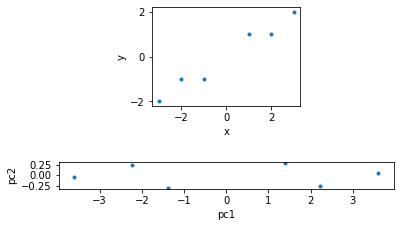

In [4]:
"""
Write your PCA code here, and plot the original data and the projected data 
"""

from sklearn.decomposition import PCA

def plotPCA(D):
  # plot the original data set
  fig=plt.figure()
  ax1=fig.add_subplot(2,1,1)
  ax1.set_aspect(1)
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  plt.plot(D[:,0], D[:,1], '.')
  # pca
  pca = PCA(n_components=2)
  pca.fit(D)
  # plot the projected data set
  Z = pca.fit_transform(D)
  ax2=fig.add_subplot(2,1,2)
  ax2.set_aspect(1)
  ax2.set_xlabel('pc1')
  ax2.set_ylabel('pc2')
  plt.plot(Z[:,0], Z[:,1], '.')
  print("Singuler values", pca.singular_values_)
  plt.show()
  

# IMPLEMENT THIS: plot the projected Z here : Z[:,0] against Z[:,1]
print("D1")
plotPCA(D1)
print("D2")
plotPCA(D2)
print("D3")
plotPCA(D3)


**Problem 3 (Written: 15 pts):**

(1) Explain why manifold learning can effectively handle data like the data set D1 in Problem 1 (the spiral data). [5pt]

(2) For the spiral data (data set D1), what would be an appropriate $\epsilon$ value for use in ISOMAP? Give a specific value as your answer (e.g. $\epsilon = 2.5$), and explain your reasoning. **Hint:** By eyeballing the data, you can see that $\epsilon$ cannot be less than a certain value (graph will be disconnected), while it cannot be greater than a certain value (points across different parts of the spiral will be connected), in order to recover the manifold structure. Pick a number between these two bounds.  [10pt] 


**Answer:**

(1) D1 could be seen as a 1-D manifold embedded in 2-D space. Therefore, manifold learning projects the data based on their geodesic distance could maintain the neighbor relationship. 

(2) $ϵ = 0.4$  
If $ϵ$ is less than 0.3 (the red line), some points would loss their connection, and if $ϵ$ is greater than 0.5 (the yellow line), some points would be connected accross the parts of spiral. 

<img src="https://drive.google.com/uc?export=view&id=16ZrOqtc5CPnv-p-C1YYfazeftlq5SlV6"> 

# Section II: Conditional Independence 

**Problem 4 (Written: 10pts)**

Consider three binary variables $a, b, c \in \{0,1\}$ having the
joint probability distribution given in the table below. Show by direct
evaluation that this distribution has the property that $a$ and $b$ are 
dependent, so that $P(a,b) \neq P(a)p(b)$, but that they become independent
when conditioned on $c$, so that $ P(a,b|c) = P(a|c)p(b|c)$ for both
$c=0$ and $c=1$ [adapted from C. M. Bishop, *Pattern Recognition and Machine Learning*, Springer, 2006].

> $a$ | $b$ | $c$ | P($a$,$b$,$c$)
> --- | --- | --- | ---
> 0 | 0 | 0 | 0.375 
> 0 | 0 | 1 | 0.05
> 0 | 1 | 0 | 0.041667 
> 0 | 1 | 1 | 0.075
> 1 | 0 | 0 | 0.075 
> 1 | 0 | 1 | 0.15
> 1 | 1 | 0 | 0.008333
> 1 | 1 | 1 | 0.225


**Answer:**


Tabulate your results in the following format:

> $a$ | $b$ | P($a$,$b$) | P($a$)P($b$)
> --- | --- | --- | ---
> 0 | 0 | 0.425 | 0.352084
> 0 | 1 | 0.116667 | 0.189583
> 1 | 0 | 0.225 | 0.297916
> 1 | 1 | 0.233333 | 0.160417

> $a$ | $b$ | $c$ | P($a$,$b$$\mid$$c$) | P($a|c$)P($b|c$)
> --- | --- | --- | --- | ---
> 0 | 0 | 0 | 0.75 | 0.75
> 0 | 0 | 1 | 0.1 | 0.1
> 0 | 1 | 0 | 0.083334 | 0.083334
> 0 | 1 | 1 | 0.15 | 0.15
> 1 | 0 | 0 | 0.15 | 0.15
> 1 | 0 | 1 | 0.3 | 0.3
> 1 | 1 | 0 | 0.016666 | 0.016666
> 1 | 1 | 1 | 0.45 | 0.45

**Program 5 (Written: 10pts)**

How is the above result related to the concept of conditional independence $P(a|b,c) = P(a|c)$, $a$ is independent from $b$ given $c$? (derive $P(a|b,c) = P(a|c)$ if $ P(a,b|c) = P(a|c)p(b|c)$: **DO NOT** simply plug in the probability values from above.

**Answer**:

Given $P(a,b|c) = P(a|c)P(b|c)$

$P(a|b,c) = \frac{P(a,b,c)}{P(b,c)} = \frac{P(a,b|c)P(c)}{P(b|c)P(c)} = \frac{P(a|c)P(b|c)P(c)}{P(b|c)P(c)} = P(a|c)$

# Section III: Naive Bayes Classifier





Consider the data set below, for spam detection. 

We will use the Naive Bayes Classifier to learn from this data and predict new sentences. 

> Sentence | Spam
> --- | ---  
> congrats you are selected | N 
> congrats you won lottery | Y
> travel for free | Y
> good credit | N
> selected for credit cards | Y
> very good | N
> free credit cards | Y
> good night | N
> lottery | Y 
> good for you | N 

In this context, each word can be treated as an attribute, and their values will be 0 or 1 depending on the absence or existence of the word in the sentence. 

For example, "congrats" will be attribute $a_0$, "you" will be attribute $a_1$, etc. Use the following mapping for the words to attributes:

> word | attribute | dictionary index (see python code below)
> --- | --- | ---
> congrats | $a_0$ | 0
> you | $a_1$ | 1
> are | $a_2$ | 2
> selected | $a_3$ | 3
> won | $a_4$ | 4
> lottery | $a_5$ | 5
> travel | $a_6$ | 6
> for | $a_7$ | 7
> free | $a_8$ | 8
> credit | $a_9$ | 9
> cards | $a_{10}$ | 10
> very | $a_{11}$ | 11
> good | $a_{12}$ | 12
> night | $a_{13}$ | 13

```
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])
```

So, the sentence "you won free travel" would be 
> $\small (a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or simply
> $\small (0,1,0,0,1,0,1,0,1,0,0,0,0,0)$

So, the probability that "you won free travel" is a spam can be written as:
> $\small P(Spam=Yes| a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or as

> $\small P(Yes|0,1,0,0,1,0,1,0,1,0,0,0,0,0)$.

Note that word ordering does not matter, and multiple occurances of the same word is simply represented as 1. 


**Problem 6 (Program: 15pt)**

Use the skeleton code in the code cell below to train Naive Bayes on the data set (sentence / spam table in the beginning of Section III). 

Enter the data in the format shown in the code cell below. ```X``` is the input, and ```y``` is the target values. The first entry in each from the sentence/spam table is already entered in the code cell, along with the skeleton code to train and test. 

To easily verify that you entered the data correctly, write a function to convert the data vector (each row in the numpy array) to a string, and use this to print out your data in a human readable form. Use the ``dictionary`` array provided in the code cell. 

```
def vec2word(vec):
   ...
   words = ...
   ...
   return words
```

(1) Implement the above and train the Naive Bayes Classifier. Report the accuracy. [5pt]

(2) Provide 3 test sentences that are classified as "Spam" (output = 1). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(3) Provide 3 test sentences that are classified as "Not spam" (output = 0). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(4) Do you think this kind of approach can scale to a full-blown spam filter for real-life applications? This is an open ended question. [5pt]

   

**Answer:**

(1) The accuracy is $100\%$.

(2) 
*   you won free credit cards, [[0.07357165 0.92642835]]
*   free lottery for you, [[0.12882492 0.87117508]]
*   congrats you won free cards, [[0.10644192 0.89355808]]

(3) 
*   you are very good, [[0.97556579 0.02443421]]
*   good credit for you, [[0.81604955 0.18395045]]
*   cards are good for you, [[0.82653517 0.17346483]]

(4) I think Naive Bayes Classifier is not suitable for a full-blown spam filter for real-life applications. This is because that Naive Bayes Classifier only consider the probability of words appearance. Naive Bayes Classifier might be failed for some complex or well-designed spams.

In [5]:


import numpy as np
from sklearn.naive_bayes import MultinomialNB

#-------
# dictionary, to look up words from the data vector -- case sensitive! 
#-------
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])

#-------
# vec2word: convert data vector to words
#-------
def vec2word(vec):
  """
  arguments: vec = np.array([0,1,...])
  returns: string of sentence corresponsing to the vector (word may not be ordered properly)
  """
  s = []
  for i in range(len(vec)):
    if vec[i]:
      s.append(dictionary[i])
  return " ".join(s)


#--------------------------------
# spam data : enter your data here 
#--------------------------------
X = np.array([
 [1,1,1,1,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,1,1,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,1,1,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
 [0,0,0,1,0,0,0,1,0,1,1,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,1,0],
 [0,0,0,0,0,0,0,0,1,1,1,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
 [0,1,0,0,0,0,0,1,0,0,0,0,1,0]
])
for s in X:
  print(vec2word(s))
print("")
y = np.array([0,1,1,0,1,0,1,0,1,0])

clf = MultinomialNB()
clf.fit(X, y)

print("Score (accuracy: 1.0 = 100%)= ",end="")
print(clf.score(X,y))

print("Spam test: you won lottery: answer=",end="")
test = np.array([[0,1,0,0,1,1,0,0,0,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("Spam test: you are very free: answer=",end="")
test = np.array([[0,1,1,0,0,0,0,0,1,0,0,1,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("3 test sentences that are classified as \"Spam\" (output = 1)")
print("Spam test: you won free credit cards: answer=",end="")
test = np.array([[0,1,0,0,1,0,0,0,1,1,1,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("Spam test: free lottery for you: answer=",end="")
test = np.array([[0,1,0,0,0,1,0,1,1,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("Spam test: congrats you won free cards: answer=",end="")
test = np.array([[1,1,0,0,1,0,0,0,1,0,1,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("3 test sentences that are classified as \"Not spam\" (output = 0)")
print("Spam test: you are very good: answer=",end="")
test = np.array([[0,1,1,0,0,0,0,0,0,0,0,1,1,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("Spam test: good credit for you: answer=",end="")
test = np.array([[0,1,0,0,0,0,0,1,0,1,0,0,1,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

print("")
print("Spam test: cards are good for you=",end="")
test = np.array([[0,1,1,0,0,0,0,1,0,0,1,0,1,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.
print(vec2word(test[0]))

congrats you are selected
congrats you won lottery
travel for free
credit good
selected for credit cards
very good
free credit cards
good night
lottery
you for good

Score (accuracy: 1.0 = 100%)= 1.0
Spam test: you won lottery: answer=[1]
[[0.23650857 0.76349143]]
you won lottery

Spam test: you are very free: answer=[0]
[[0.72690638 0.27309362]]
you are free very

3 test sentences that are classified as "Spam" (output = 1)
Spam test: you won free credit cards: answer=[1]
[[0.07357165 0.92642835]]
you won free credit cards

Spam test: free lottery for you: answer=[1]
[[0.12882492 0.87117508]]
you lottery for free

Spam test: congrats you won free cards: answer=[1]
[[0.10644192 0.89355808]]
congrats you won free cards

3 test sentences that are classified as "Not spam" (output = 0)
Spam test: you are very good: answer=[0]
[[0.97556579 0.02443421]]
you are very good

Spam test: good credit for you: answer=[0]
[[0.81604955 0.18395045]]
you for credit good

Spam test: cards are good for yo

# Section IV: Local Methods

**Problem 7 (Written: 15 pts)**

The SOM, given an input vector $\vec{x}$ and the best matching unit index $i(\vec{x})$, the learning rule for the reference vector for unit $j$ is:
$$ \vec{w}_j \leftarrow \vec{w}_j + \eta h(j,i(\vec{x}))(\vec{x} - \vec{w}_j) $$

- The learning rate is fixed $\eta = 1$.

- Let $h(j,i(\vec{x})) = 1$, for the best matching unit $j=i(\vec{x})$, $h(j,i(\vec{x})) = \frac{2}{3}$ for its immediate neighbor ($j = i(\vec{x})\pm1$) and $h(j,i(\vec{x})) = \frac{1}{3}$ for its second-order neighbor ($j = i(\vec{x})\pm2$). For all the rest, $h(j,i(\vec{x})) =0$.

(1) Consider a 1-D SOM with 7 units with the following weight vectors.
Plot the vectors and connect them according to the order given below ($\vec{w}_1$ connected to $\vec{w}_2$, etc.).
>  $\vec{w}$ | $w_1$ | $w_2$
> --- | --- | ---
> $\vec{w}_1$ | 2 | 0
> $\vec{w}_2$ | 6 | 6
> $\vec{w}_3$ | 1 | 4
> $\vec{w}_4$ | 3 | 6
> $\vec{w}_5$ | 1 | 1
> $\vec{w}_6$ | 6 | 2
> $\vec{w}_7$ | 5 | 4

(2) Given an input vector $\vec{x} = (2,6)$, plot how the weight vectors change after one iteration of training. Plot in the same graph as (1) above.

**Answer:**

(1) 

<img src="https://drive.google.com/uc?export=view&id=15UdL4G6gYaECpRclzVEq-jnwZFjjt_Tp"> 

(2) 

<img src="https://drive.google.com/uc?export=view&id=1fPWPD-_GpUPtOe4jNRxlBeaqXqTY7lwo"> 

You may use a code cell to plot the above.


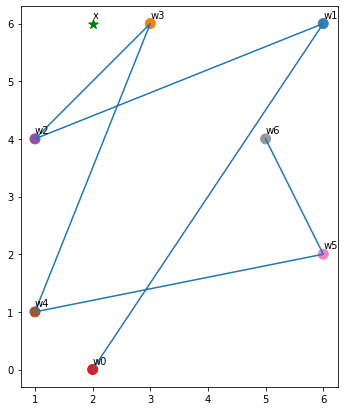

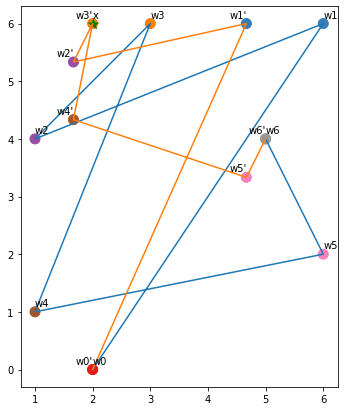

In [8]:
W = np.array([[2,0],[6,6],[1,4],[3,6],[1,1],[6,2],[5,4]], dtype=float)
x = np.array([2,6])

fig1=plt.figure(figsize = (7,7))
ax1=fig1.add_subplot(1,1,1)
ax1.set_aspect(1)
plt.plot(W[:,0], W[:,1])
colors = [i for i in range(len(W))]
plt.scatter(W[:,0], W[:,1], s=100, c=colors, cmap='Set1')
for i in range(len(W)):
    plt.annotate('w{}'.format(i), (W[i][0], W[i][1] + 0.1))
plt.scatter(x[0], x[1], s=100, marker='*', c="g")
plt.annotate('x', (x[0], x[1] + 0.1))
plt.show()


BMU = -1;
d = 1000
for i in range(len(W)):
  if(pow(x[0]-W[i][0],2) + pow(x[1]-W[i][1],2) < d):
    BMU = i
    d = pow(x[0]-W[i][0],2) + pow(x[1]-W[i][1],2)

w1 = np.copy(W)
w1[BMU] += (x-w1[BMU])
w1[BMU-1] += 2/3*(x-w1[BMU-1])
w1[BMU+1] += 2/3*(x-w1[BMU+1])
w1[BMU-2] += 1/3*(x-w1[BMU-2])
w1[BMU+2] += 1/3*(x-w1[BMU+2])

fig2=plt.figure(figsize = (7,7))
ax2=fig2.add_subplot(1,1,1)
ax2.set_aspect(1)
plt.plot(W[:,0], W[:,1])
plt.scatter(W[:,0], W[:,1], s=100, c=colors, cmap='Set1')
for i in range(len(W)):
    plt.annotate('w{}'.format(i), (W[i][0], W[i][1] + 0.1))
plt.plot(w1[:,0], w1[:,1])
plt.scatter(w1[:,0], w1[:,1], s=100, c=colors, cmap='Set1')
for i in range(len(W)):
    plt.annotate('w{}\''.format(i), (w1[i][0]-0.3, w1[i][1]+0.1))
plt.scatter(x[0], x[1], s=100, marker='*', c="g")
plt.annotate('x', (x[0], x[1]+0.1))
plt.show()

**Problem 8 (Written: 10pts)**

(1) In radial basis function networks, among (a) the RBF units, (b) output units, and (c) RBF-to-output connections, which part is associated the most with  "local" in "local learning"? Explain why. [5pt]

(2) In radial basis function networks, among (a) parameters of the RBF units (center and variance) and (b) RBF-to-output connection weights, which one can be learned in one-shot, without many iterations? Explain why. [5pt] 

**Answer:**

(1) The RBF units is associated the most with "local" in "local learning". The RBF unit, like k-means, is used to divide input data into different clusters. 

(2) RBF-to-output connection weight can be learned in one-shot. The output of RBF unit and the label of data are fixed. Therefore, RBF-to-output connection weight can be calculated by using pseudo inverse.